<a href="https://colab.research.google.com/github/Rohit280903/DAV_Exp/blob/main/DAV_Exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim:**Multiple Linear Regression in Python and R

**Lab Outcomes (LO):** Implement various Regression techniques for prediction. (LO2)

**Tools and Libraries**: Python Libraries: scikit-learn, matplotlib, numpy, pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
startups=pd.read_csv("/content/50_Startups.csv")
df=startups.copy()
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

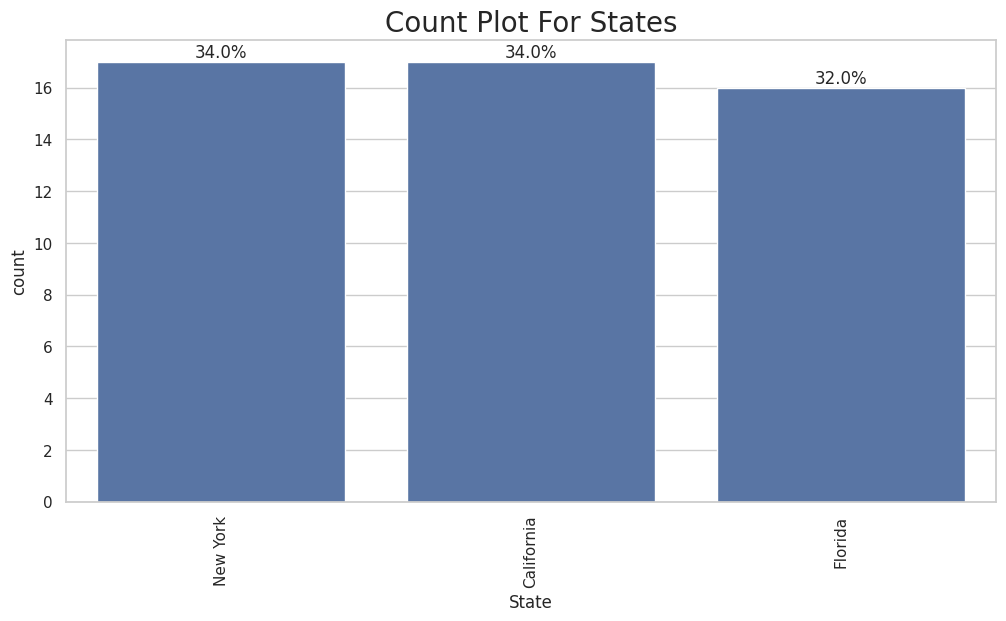

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
total = float(len(df))
ax = sns.countplot(x="State", data=df)
plt.xticks(rotation=90)
plt.title("Count Plot For States", fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

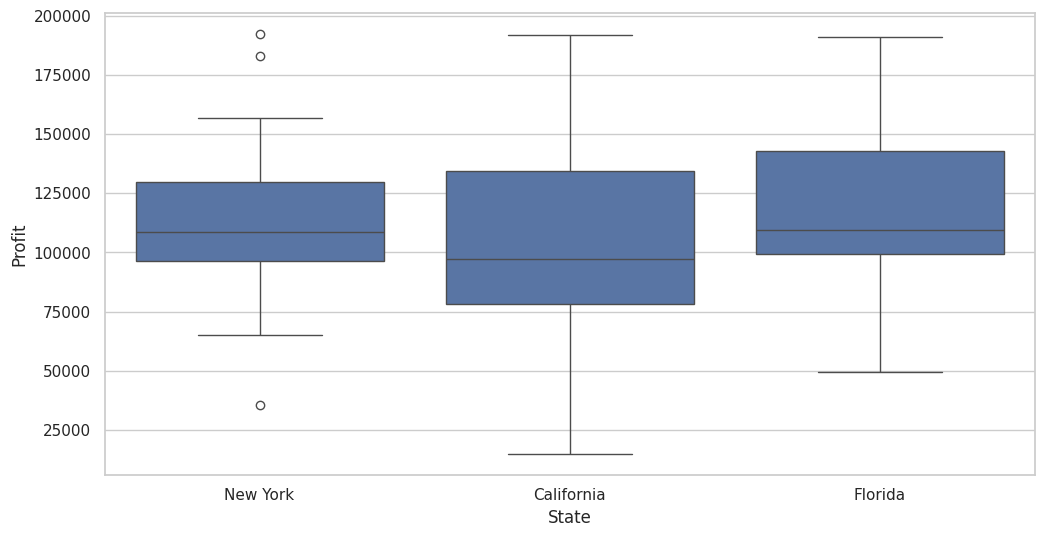

In [8]:
plt.figure(figsize=(12, 6))
fig = sns.boxplot(x='State', y="Profit", data=df.sort_values('Profit',ascending=False))
plt.show()

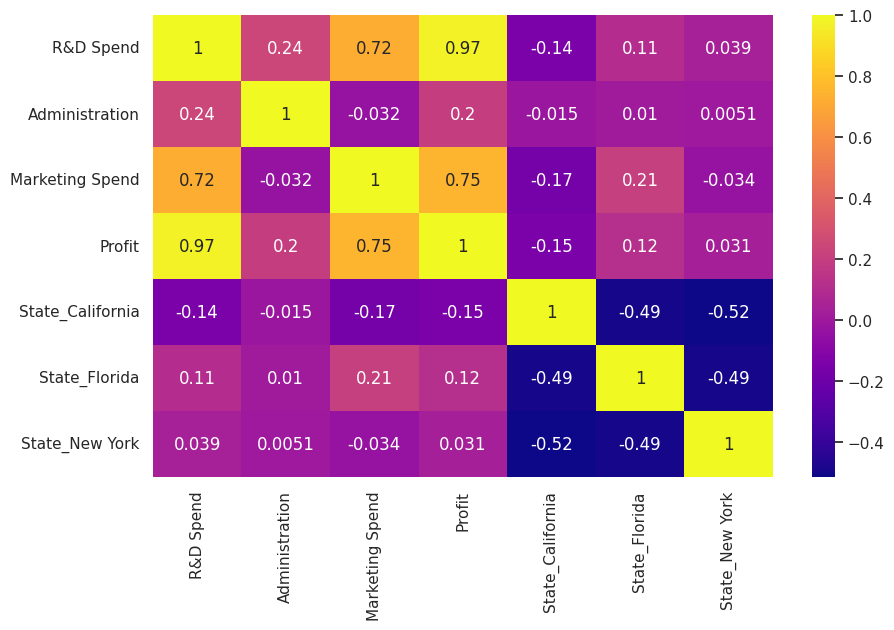

In [9]:
# Checking for correlation

categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='plasma')
plt.show()


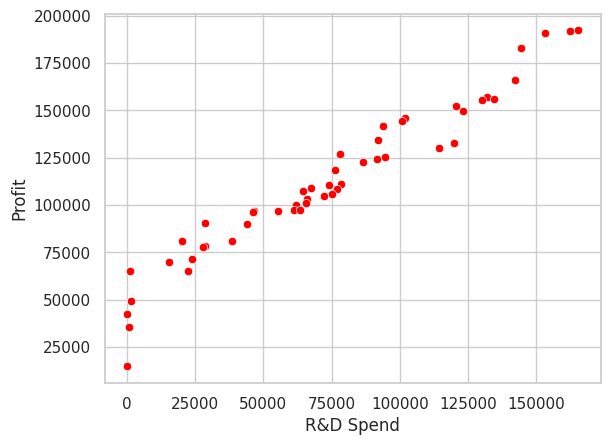

In [10]:
sns.scatterplot(x='R&D Spend',y='Profit',data=df , color="red");

<function matplotlib.pyplot.show(close=None, block=None)>

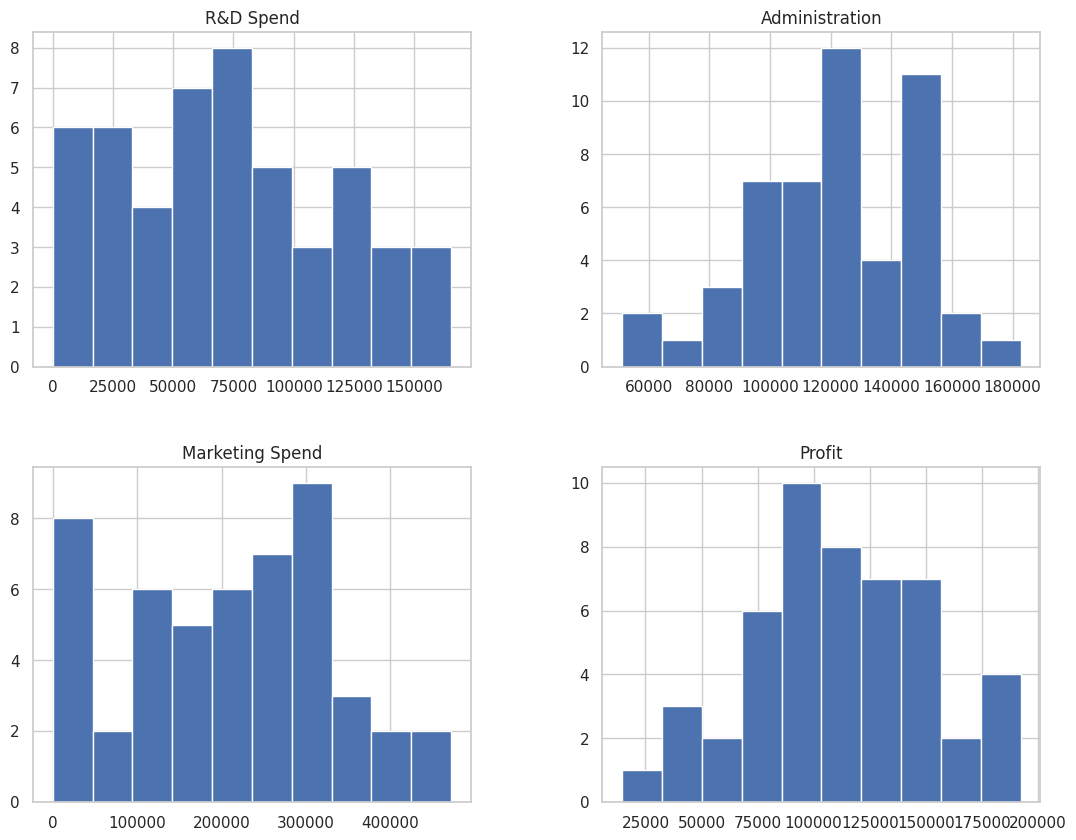

In [11]:
df.hist(figsize=(13,10))
plt.show

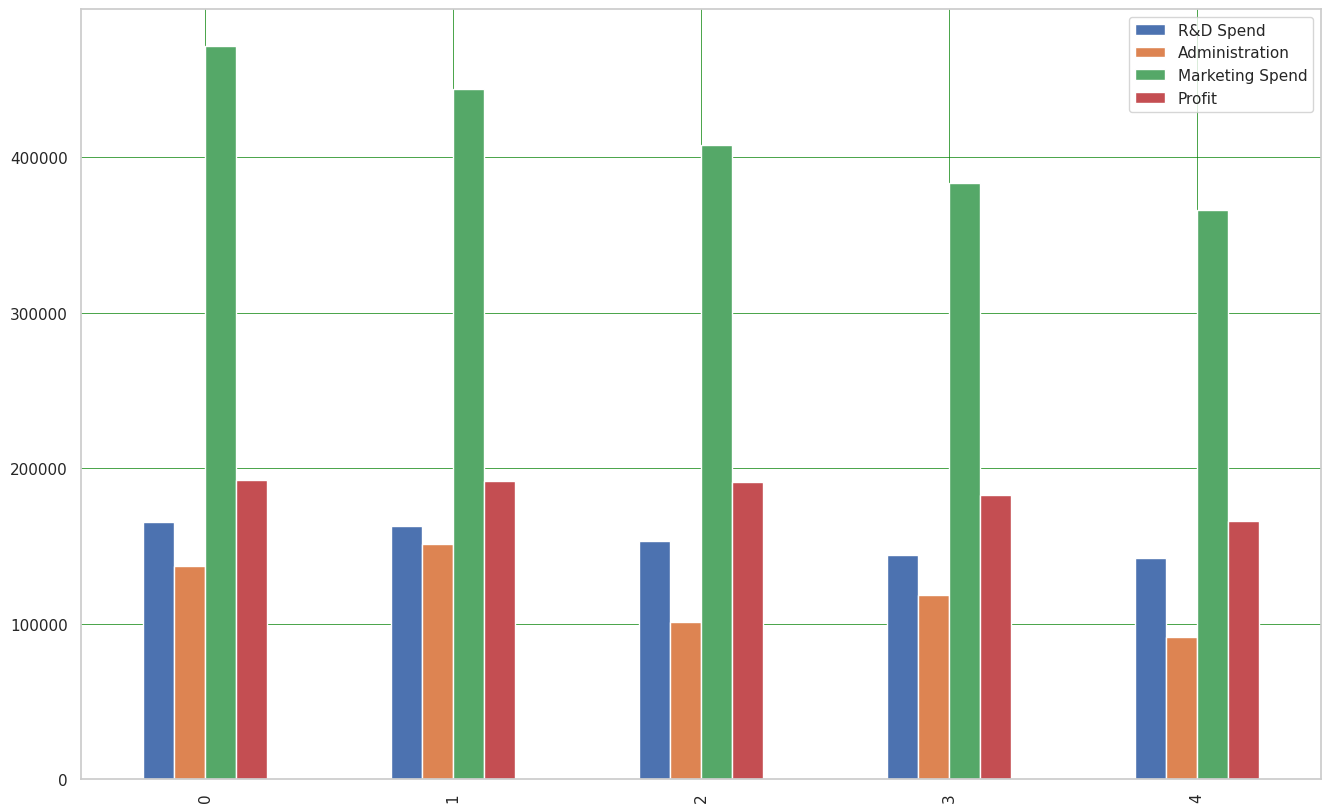

In [12]:
df1 = startups.head()
df1.plot(kind="bar", figsize=(16,10))
plt.grid(which="major",linestyle="-", linewidth="0.5",color="green")

plt.show()

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [14]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [15]:
df_State = pd.get_dummies(df["State"], dtype= int)
df_State

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [16]:
dfDummies = pd.get_dummies(df["State"], prefix="State", dtype=int)
dfDummies

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [17]:
df=pd.concat([df,dfDummies] , axis=1)

In [18]:
df=df.drop(['State','State_Florida'], axis =1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0


In [19]:
x=df.drop(['Profit'],axis=1)
y=df['Profit']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 35)

In [22]:
X_train

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
48,542.05,51743.15,0.00,0,1
34,46426.07,157693.92,210797.67,1,0
2,153441.51,101145.55,407934.54,0,0
20,76253.86,113867.30,298664.47,1,0
37,44069.95,51283.14,197029.42,1,0
10,101913.08,110594.11,229160.95,0,0
1,162597.70,151377.59,443898.53,1,0
36,28663.76,127056.21,201126.82,0,0
16,78013.11,121597.55,264346.06,1,0
6,134615.46,147198.87,127716.82,1,0


In [23]:
X_test

,R&D Spend,Administration,Marketing Spend,State_California,State_New York
39,38558.51,82982.09,174999.30,1,0
26,75328.87,144135.98,134050.07,0,0
22,73994.56,122782.75,303319.26,0,0
31,61136.38,152701.92,88218.23,0,1
29,65605.48,153032.06,107138.38,0,1
43,15505.73,127382.30,35534.17,0,1
41,27892.92,84710.77,164470.71,0,0
17,94657.16,145077.58,282574.31,0,1
25,64664.71,139553.16,137962.62,1,0
23,67532.53,105751.03,304768.73,0,0


In [24]:
y_train

48     35673.41
34     96712.80
2     191050.39
20    118474.03
37     89949.14
10    146121.95
1     191792.06
36     90708.19
16    126992.93
6     156122.51
28    103282.38
5     156991.12
7     155752.60
24    108552.04
38     81229.06
13    134307.35
49     14681.40
46     49490.75
19    122776.86
3     182901.99
21    111313.02
12    141585.52
45     64926.08
27    105008.31
30     99937.59
8     152211.77
42     71498.49
11    144259.40
40     78239.91
0     192261.83
47     42559.73
33     96778.92
44     65200.33
15    129917.04
9     149759.96
Name: Profit, dtype: float64

In [25]:
y_test

39     81005.76
26    105733.54
22    110352.25
31     97483.56
29    101004.64
43     69758.98
41     77798.83
17    125370.37
25    107404.34
23    108733.99
35     96479.51
4     166187.94
18    124266.90
32     97427.84
14    132602.65
Name: Profit, dtype: float64

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [27]:
model = lm.fit(X_train, y_train)

In [28]:
y_pred = model.predict(X_test)
y_pred

array([ 82650.91171141, 114969.39758648, 118676.50929825,  96544.92731097,
       100747.90907156,  57717.39681268,  77491.15050368, 129634.19513027,
       102260.23338706, 113685.43462948,  88383.71117127, 177651.49084482,
       133416.99793513,  99051.42621284, 155021.60473219])

In [29]:
df = pd.DataFrame({"y_test" : y_test, "y_pred"
                   : y_pred, "diff between y_pred and y_test" :abs(y_pred-y_test)})
df

,y_test,y_pred,diff between y_pred and y_test
39,81005.76,82650.911711,1645.151711
26,105733.54,114969.397586,9235.857586
22,110352.25,118676.509298,8324.259298
31,97483.56,96544.927311,938.632689
29,101004.64,100747.909072,256.730928
43,69758.98,57717.396813,12041.583187
41,77798.83,77491.150504,307.679496
17,125370.37,129634.195130,4263.825130
25,107404.34,102260.233387,5144.106613
23,108733.99,113685.434629,4951.444629


In [30]:
model.score(X_train, y_train)

0.956142267350216

In [31]:
print('Intercept of the model:\n',lm.intercept_)
print("="*50)
print('Coefficient of the line:\n',lm.coef_)

Intercept of the model:
 51762.58288825296
Coefficient of the line:
 [ 8.32481595e-01 -2.06061407e-02  2.58634933e-02 -4.02707371e+03
 -5.24760110e+03]


# **In R :**

In [25]:
install.packages("caret")
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(caret)
library(corrplot)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [27]:
Data <- read.csv("/content/company.csv")

In [28]:
x.cor=cor(Data)
x.cor

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.9012079
Radio,0.05480866,1.00000000,0.35410375,0.3496311
Newspaper,0.05664787,0.35410375,1.00000000,0.1579600
Sales,0.90120791,0.34963110,0.15796003,1.0000000


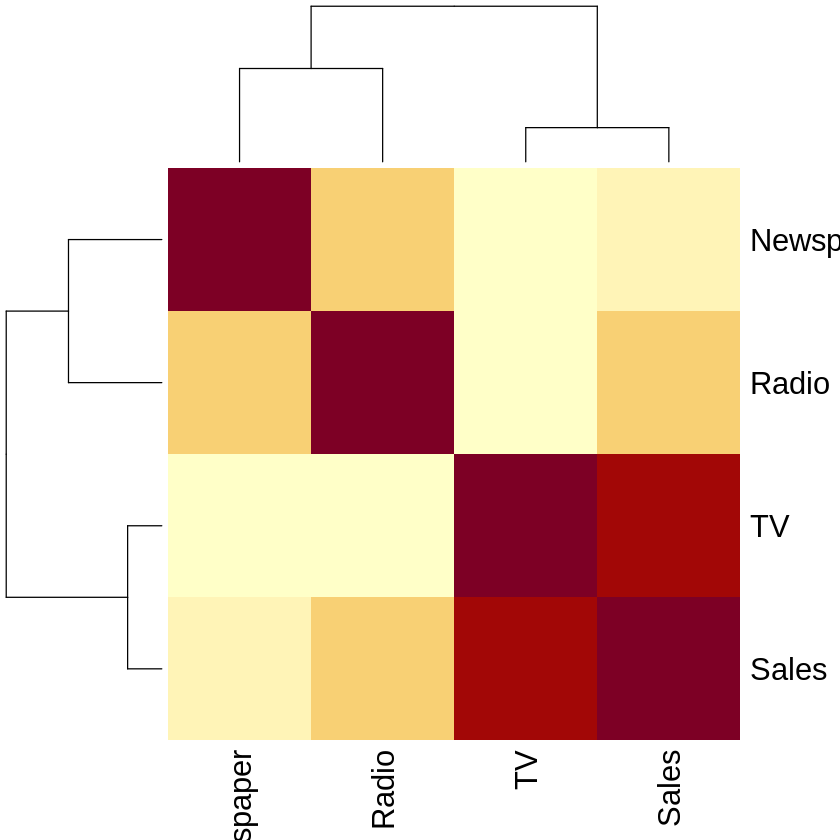

In [29]:
heatmap(x = x.cor, symm = TRUE)

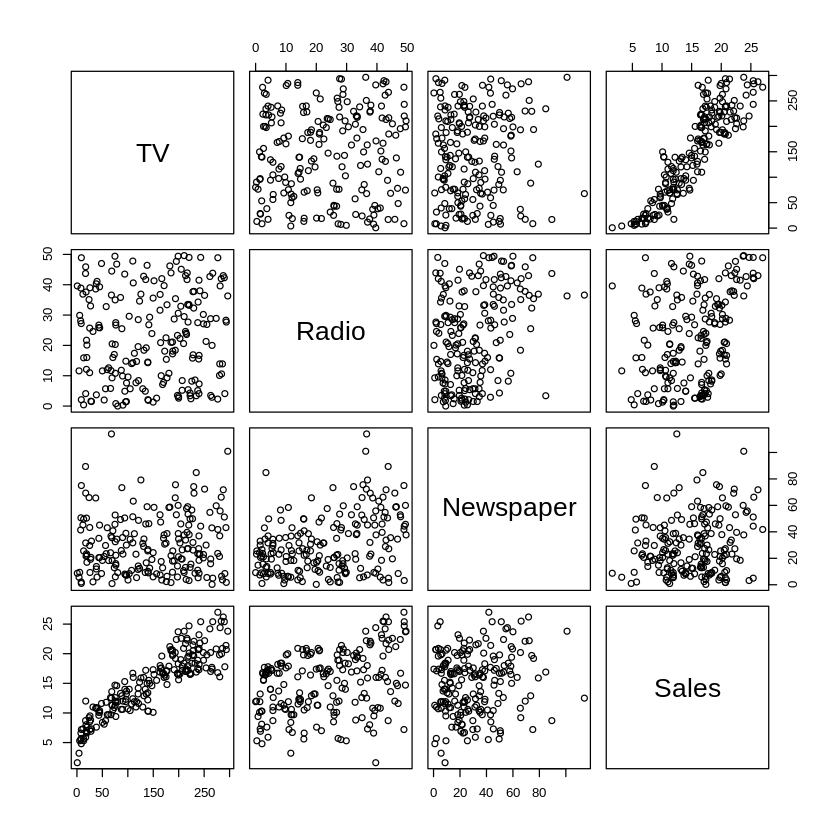

In [30]:
pairs(Data)

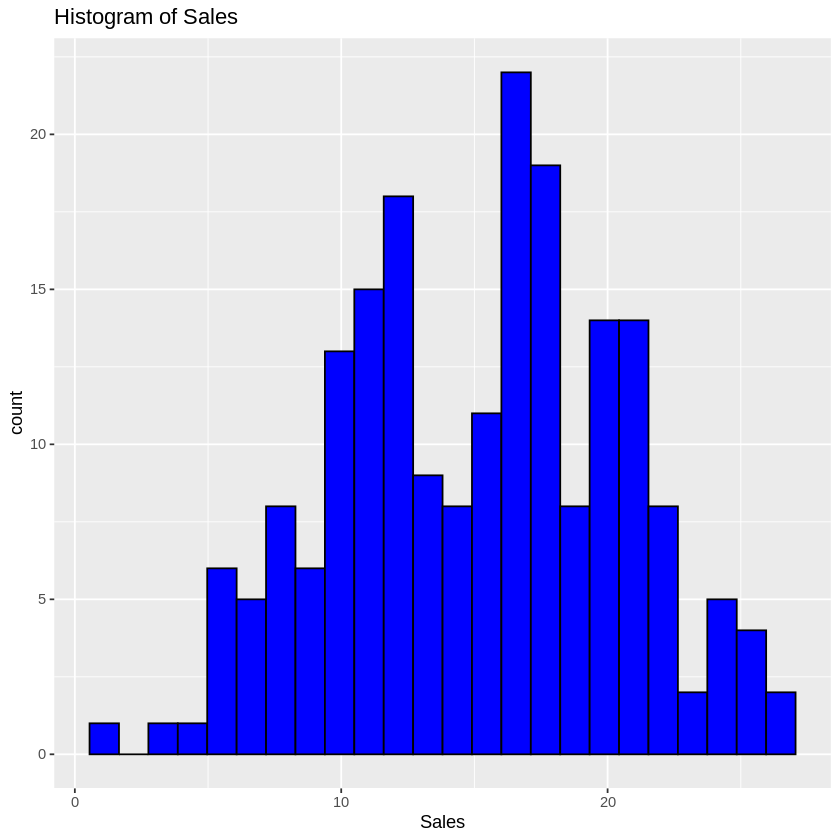

In [31]:
hist_plot <- ggplot(Data, aes(x = Sales)) +
  geom_histogram(color = "black", fill = "blue", bins = 24) +
  labs(title = "Histogram of Sales")
print(hist_plot)

In [32]:
set.seed(42)
train_index <- createDataPartition(Data$Sales, p = 0.75, list = FALSE)
x_train <- subset(Data, rownames(Data) %in% train_index, select = c("Sales", "TV", "Radio"))
x_test <- subset(Data, !(rownames(Data) %in% train_index), select = c("Sales", "TV", "Radio"))

In [33]:
model <- lm(Sales ~ ., data =x_train)
summary(model)


Call:
lm(formula = Sales ~ ., data = x_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.5858 -0.7460  0.0304  0.8881  3.6648 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.840145   0.340909   14.20   <2e-16 ***
TV          0.052675   0.001628   32.36   <2e-16 ***
Radio       0.108807   0.009584   11.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.697 on 148 degrees of freedom
Multiple R-squared:  0.8942,	Adjusted R-squared:  0.8928 
F-statistic: 625.4 on 2 and 148 DF,  p-value: < 2.2e-16


In [34]:
x_train <- x_train["TV","Radio"]
x_test <- x_test["TV","Radio"]
y_train <- x_train["Sales"]
y_test <- x_test["Sales"]

In [35]:
x_test <- data.frame(TV = x_test["TV"],Radio=x_test["Radio"])

In [36]:
y_predict <- predict(model, newdata = x_test)

In [37]:
install.packages('plot3D')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘misc3d’




Warning message:
“no DISPLAY variable so Tk is not available”


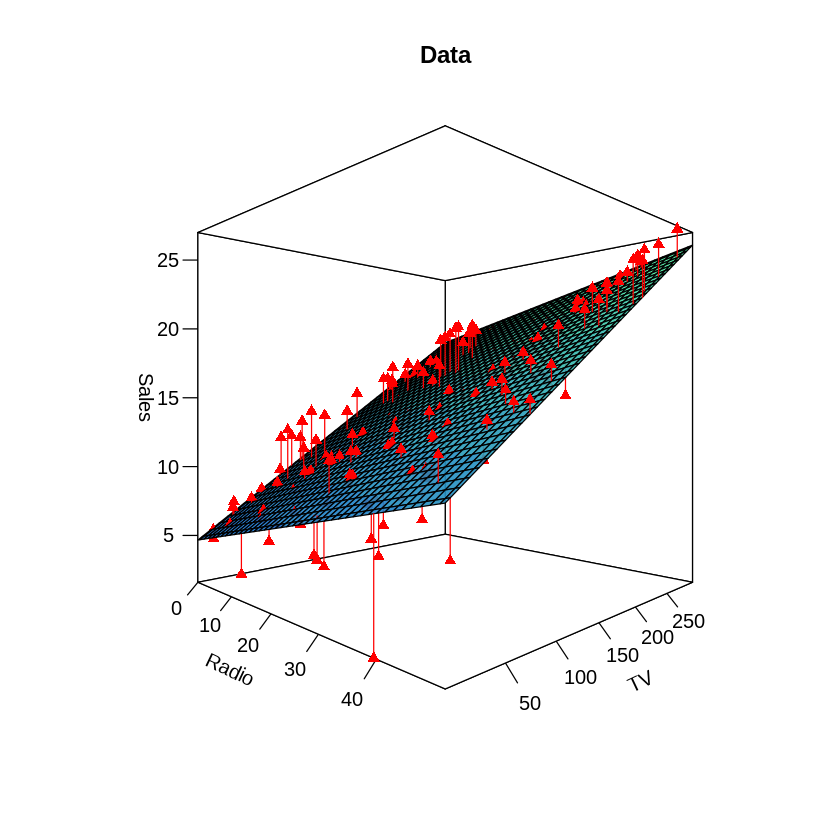

In [38]:
library("plot3D")

# set the x, y, and z variables
x <- Data$Radio
y <- Data$TV
z <- Data$Sales

# Compute the linear regression
fit <- lm(z ~ x + y)

# create a grid from the x and y values (min to max) and predict values for every point
# this will become the regression plane
grid.lines = 40
x.pred <- seq(min(x), max(x), length.out = grid.lines)
y.pred <- seq(min(y), max(y), length.out = grid.lines)
xy <- expand.grid( x = x.pred, y = y.pred)
z.pred <- matrix(predict(fit, newdata = xy),
                 nrow = grid.lines, ncol = grid.lines)

# create the fitted points for droplines to the surface
fitpoints <- predict(fit)

scatter3D(x, y, z, pch = 17, col="red",
          theta = 45, phi = 0,
          ticktype = "detailed",
          xlab = "Radio", ylab = "TV", zlab = "Sales",
          surf = list(x = x.pred, y = y.pred, z = z.pred,
                      facets = TRUE, fit = fitpoints, col=ramp.col (col = c("dodgerblue3","seagreen2")
                      , n = 10, alpha=0.9),border="black"), main = "Data")

**Conclusion**
Plotting for multiple linear regression models can be a powerful tool for data scientists and software engineers. With Matplotlib, we can easily visualize the relationship between the independent variables and the dependent variable and gain insights into the data. In this blog post, we have explored how to plot for multiple linear regression using Matplotlib. We have covered the steps required to create a scatter plot with a regression line and a 3D plot with multiple independent variables. We hope this blog post has been helpful to you in your work with multiple linear regression models.